# Imports and Settings

In [1]:
import numpy as np
import torch
import torch.nn as nn
from Code.Models.SchNet.schnet import SchNet
from Code.Train.trainer import Trainer
from Code.Tools.Network.lr_scheduler import AbcExponentialLR
import matplotlib
%matplotlib inline

In [2]:
debug = False
use_cuda = True

In [17]:
data_path_train = './Dataset/SchNet/iso17_train_X.npy'
label_path_train = './Dataset/SchNet/iso17_train_Y.npy'
data_path_within = './Dataset/SchNet/iso17_within_X.npy'
label_path_within = './Dataset/SchNet/iso17_within_Y.npy'
data_path_other = './Dataset/SchNet/iso17_other_X.npy'
label_path_other = './Dataset/SchNet/iso17_other_Y.npy'
comment = 'schnet_30_s100000_ema2'
eval_path = './evaluation/SchNet'

# Load Data

In [18]:
X_train = np.load(data_path_train)
Y_train = np.load(label_path_train) * -1
X_within = np.load(data_path_within)
Y_within = np.load(label_path_within) * -1
X_other = np.load(data_path_other)
Y_other = np.load(label_path_other) * -1

In [5]:
X_train.shape

(404000, 19, 19)

In [6]:
if debug:
    n_data = 4000
    X_train = X_train[:n_data]
    Y_train = Y_train[:n_data]
    X_within = X_within[:n_data]
    Y_within = Y_within[:n_data]

# Initialize Network

In [7]:
optimizer = torch.optim.Adam
loss_fn = torch.nn.MSELoss
lr_scheduler = AbcExponentialLR
lr_schedule = (0.001, 0.96, 1)
schnet = SchNet()
trainer = Trainer(model=schnet, optimizer=optimizer, loss_fn=loss_fn, eval_path=eval_path,
                  comment=comment, lr_scheduler=lr_scheduler, abc_schedule=lr_schedule,
                  use_cuda=use_cuda, lr_step='s100000', single_test_batch=True, use_ema=True)

In [19]:
trainer.create_dataloaders(X_train, Y_train, X_other, Y_other, 32, num_workers=2)

# Train

In [9]:
trainer.fit(300)

epoch: 1	progress: 0.0	time estimate: 2575.4	train loss: 0.005196	test loss: 0.001896
epoch: 2	progress: 0.01	time estimate: 2565.66	train loss: 0.001445	test loss: 0.000663
epoch: 3	progress: 0.01	time estimate: 2557.48	train loss: 0.000996	test loss: 0.000531
epoch: 4	progress: 0.01	time estimate: 2549.26	train loss: 0.000811	test loss: 0.000484
epoch: 5	progress: 0.02	time estimate: 2540.05	train loss: 0.000714	test loss: 0.000372
epoch: 6	progress: 0.02	time estimate: 2531.35	train loss: 0.000649	test loss: 0.000498
epoch: 7	progress: 0.02	time estimate: 2522.34	train loss: 0.000595	test loss: 0.000331
epoch: 8	progress: 0.03	time estimate: 2513.34	train loss: 0.000556	test loss: 0.000557
epoch: 9	progress: 0.03	time estimate: 2504.32	train loss: 0.000526	test loss: 0.00041
epoch: 10	progress: 0.03	time estimate: 2495.41	train loss: 0.000499	test loss: 0.000335
epoch: 11	progress: 0.04	time estimate: 2486.5	train loss: 0.000476	test loss: 0.000381
epoch: 12	progress: 0.04	time esti

epoch: 94	progress: 0.31	time estimate: 1771.39	train loss: 0.000158	test loss: 0.000153
epoch: 95	progress: 0.32	time estimate: 1762.79	train loss: 0.000157	test loss: 0.000177
epoch: 96	progress: 0.32	time estimate: 1754.18	train loss: 0.000157	test loss: 0.000132
epoch: 97	progress: 0.32	time estimate: 1745.58	train loss: 0.000157	test loss: 0.000169
epoch: 98	progress: 0.33	time estimate: 1736.98	train loss: 0.000156	test loss: 0.000214
epoch: 99	progress: 0.33	time estimate: 1728.39	train loss: 0.000156	test loss: 0.000197
epoch: 100	progress: 0.33	time estimate: 1719.79	train loss: 0.000156	test loss: 0.000245
epoch: 101	progress: 0.34	time estimate: 1711.19	train loss: 0.000155	test loss: 0.000223
epoch: 102	progress: 0.34	time estimate: 1702.58	train loss: 0.000155	test loss: 0.000238
epoch: 103	progress: 0.34	time estimate: 1693.96	train loss: 0.000155	test loss: 0.000227
epoch: 104	progress: 0.35	time estimate: 1685.36	train loss: 0.000154	test loss: 0.000142
epoch: 105	progr

epoch: 186	progress: 0.62	time estimate: 980.2	train loss: 0.000147	test loss: 0.000143
epoch: 187	progress: 0.62	time estimate: 971.61	train loss: 0.000147	test loss: 0.000268
epoch: 188	progress: 0.63	time estimate: 963.0	train loss: 0.000147	test loss: 0.000291
epoch: 189	progress: 0.63	time estimate: 954.4	train loss: 0.000147	test loss: 0.000131
epoch: 190	progress: 0.63	time estimate: 945.81	train loss: 0.000147	test loss: 0.000152
epoch: 191	progress: 0.64	time estimate: 937.21	train loss: 0.000147	test loss: 0.000105
epoch: 192	progress: 0.64	time estimate: 928.6	train loss: 0.000147	test loss: 0.000129
epoch: 193	progress: 0.64	time estimate: 920.01	train loss: 0.000147	test loss: 0.000343
epoch: 194	progress: 0.65	time estimate: 911.41	train loss: 0.000147	test loss: 0.000178
epoch: 195	progress: 0.65	time estimate: 902.81	train loss: 0.000147	test loss: 0.000201
epoch: 196	progress: 0.65	time estimate: 894.21	train loss: 0.000147	test loss: 0.000225
epoch: 197	progress: 0.66

epoch: 279	progress: 0.93	time estimate: 180.56	train loss: 0.000146	test loss: 0.000143
epoch: 280	progress: 0.93	time estimate: 171.96	train loss: 0.000146	test loss: 0.000182
epoch: 281	progress: 0.94	time estimate: 163.37	train loss: 0.000146	test loss: 0.000109
epoch: 282	progress: 0.94	time estimate: 154.77	train loss: 0.000146	test loss: 0.000157
epoch: 283	progress: 0.94	time estimate: 146.17	train loss: 0.000146	test loss: 0.000156
epoch: 284	progress: 0.95	time estimate: 137.57	train loss: 0.000146	test loss: 0.000143
epoch: 285	progress: 0.95	time estimate: 128.97	train loss: 0.000146	test loss: 0.000158
epoch: 286	progress: 0.95	time estimate: 120.38	train loss: 0.000146	test loss: 0.000292
epoch: 287	progress: 0.96	time estimate: 111.78	train loss: 0.000146	test loss: 0.000243
epoch: 288	progress: 0.96	time estimate: 103.18	train loss: 0.000146	test loss: 0.000126
epoch: 289	progress: 0.96	time estimate: 94.58	train loss: 0.000146	test loss: 0.000164
epoch: 290	progress: 0

# Evaluate

In [20]:
trainer.calculate_mae()

0.24905982613563538

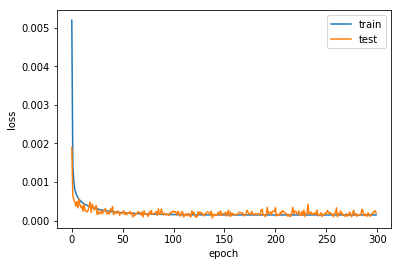

In [11]:
trainer.create_loss_plot()

In [12]:
trainer.show_loss_plot()

/home/stfn/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [13]:
trainer.save_loss_plot()

In [14]:
from matplotlib import pyplot as plt

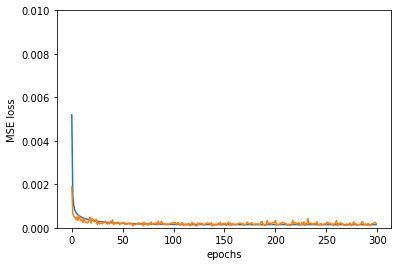

In [15]:
plt.plot(trainer.train_losses)
plt.plot(trainer.test_losses)
plt.ylabel('MSE loss')
plt.xlabel('epochs')
plt.ylim([0, 0.01])
plt.savefig('x')

In [16]:
import copy
s2 = copy.deepcopy(schnet)